In [38]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from sklearn.model_selection import cross_val_score
import seaborn as sns 

%matplotlib inline

In [39]:
BCData = pd.read_csv("BreastCancerData.csv")
display(BCData)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


In this following data, we can simply just remove the id column as it does not affect or give necessary information that will help us detect whether the following patient has cancer or not. We will also remove the last column too.

In addition, in the diagonis column, we specify that M is malignant (positive test case) while B represents benign (negative test case)

In [40]:
BCData = BCData.drop("id", axis = 1)

In [41]:
BCData = BCData.drop("Unnamed: 32", axis = 1)
BCoutput = BCData["diagnosis"].copy()
BCData = BCData.drop("diagnosis", axis = 1)


In [42]:
display(BCData)

if True in BCData.isnull(): 
    print("There are empty values in our data")
else:
    print("There are no empty, null values")


,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


There are no empty, null values


In [43]:
count = 0
for i in range(len(BCoutput)):
    if BCoutput[i] == "M":
        count+=1 

print(count/ (len(BCoutput)) * 100,"%", '')

37.258347978910365 % 


<AxesSubplot:>

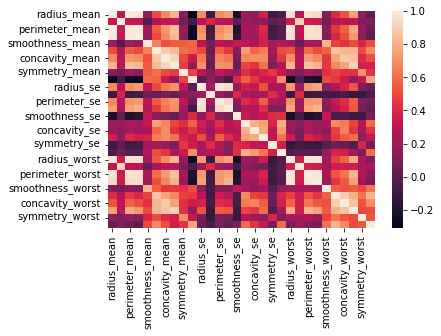

In [44]:
correlationData = BCData.corr()
sns.heatmap(correlationData)

We can clearly see that we have too many data columns to equip, so we are going to go try to simplify our data 
to make it more feasible for our models to predict our data. We accomplish this by using principal component analysis.
This will reduce the number of dimensions greatly while preserving a huge portion of the data's characteristics. 

Text(0, 0.5, 'Percentage of Variance')

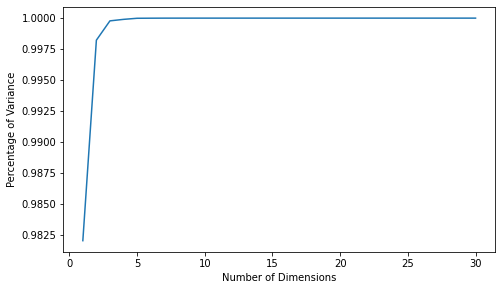

In [45]:
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(BCData)

Variances = pca.explained_variance_ratio_
XAxis = np.arange(1, 31, 1)
YAxis = np.cumsum(Variances)

fig = plt.figure(figsize = (3,2))
ax = fig.add_axes([0.1,0.1, 2.0, 1.7])

ax.plot(XAxis, YAxis)

"plt.plot(XAxis, YAxis)"
plt.xlabel("Number of Dimensions")
plt.ylabel("Percentage of Variance")

In [46]:
display(YAxis)

array([0.98204467, 0.99822116, 0.99977867, 0.9998996 , 0.99998788,
       0.99999453, 0.99999854, 0.99999936, 0.99999971, 0.99999989,
       0.99999996, 0.99999998, 0.99999999, 0.99999999, 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ])

We can clearly see that we can preserve our data by using a smaller dimension. In this case, we can preserve our data up to the 10th dimension, which is a third of the 30 dimensions. We can still use a smaller dimension, but we believe this would ensure accuracy in preserving the variance of data.

In [47]:
pca = PCA(n_components = 10)
BCTransformed = pca.fit_transform(BCData)

Right now, we are going to test and evaluate multiple models that will predict our data. We will test 3 different classification models which are support vector machines (SVM), logistic regression, and decision trees. After finding the best model, we are going to go optimize our data using standardization techniques. 

Splitting the data: 

In [48]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

BCDataoutput = pd.DataFrame(BCData)
X_train, X_test, Y_train, Y_test = train_test_split(BCTransformed, BCoutput, train_size = 0.67, random_state = 42)

Model number one: Using Logistic Regression. 

In [49]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV 


paramGrid = [{'penalty': ['l1', 'l2', 'elasticnet'], 'C': np.linspace(start = 0.1, stop = 3.5, num = 15)
}]
logTest = LogisticRegression(max_iter = 10000)

grid_search = GridSearchCV(logTest, paramGrid, cv = 5, scoring = "accuracy", return_train_score = True)
grid_search.fit(X_train, Y_train)

c:\Users\jiwon\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
150 fits failed out of a total of 225.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
75 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\jiwon\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\jiwon\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "c:\Users\jiwon\AppData\Local\Programs\Py

GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=10000),
             param_grid=[{'C': array([0.1       , 0.34285714, 0.58571429, 0.82857143, 1.07142857,
       1.31428571, 1.55714286, 1.8       , 2.04285714, 2.28571429,
       2.52857143, 2.77142857, 3.01428571, 3.25714286, 3.5       ]),
                          'penalty': ['l1', 'l2', 'elasticnet']}],
             return_train_score=True, scoring='accuracy')

In [50]:
print(grid_search.best_params_)
logTest = LogisticRegression(penalty = "l2", C = 1.557)


{'C': 1.5571428571428572, 'penalty': 'l2'}


In [51]:
score = cross_val_score(logTest, X = X_train, y = Y_train, cv = 4)

c:\Users\jiwon\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\jiwon\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/st

In [52]:
from sklearn.metrics import precision_score, recall_score
averageScore = np.mean(score)
print("The score our logistic regression performed is:", averageScore, "when it is in training session")

logTest.fit(X_train, Y_train)
logPreds = logTest.predict(X_train)
print("Precision score:", precision_score(Y_train, logPreds, pos_label = "M"))
print("Recall score:", recall_score(Y_train, logPreds, pos_label = "M"))


The score our logistic regression performed is: 0.9527138157894737 when it is in training session
Precision score: 0.9640287769784173
Recall score: 0.9241379310344827


c:\Users\jiwon\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


We are going to further assess the logistic regression model by plotting the Receiving Operatng Curve (ROC). This will highlight some of the aspects of the model in its false positive rate, true positive rate, recall, etc.

c:\Users\jiwon\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


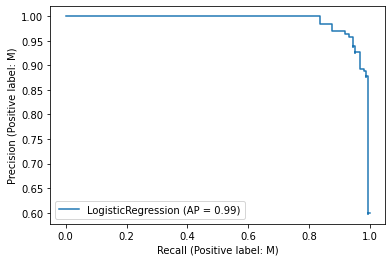

In [53]:
from sklearn.metrics import plot_precision_recall_curve
plot_precision_recall_curve(logTest, X_train, Y_train)


We'll also have to create a Validation and Testing Set. Validation to choose the best parameters and testing to choose which is the best model out of different models as well!!! Test set can only be used once per each model!!!!

Now, we're also going to go assess the Support Vector Machines to see whether it can perform better or not. However, we do need to adjust several of the parametesr to find the optimal support vector machine to use.

In [54]:
from sklearn.svm import SVC

LinearSVM = SVC()
PolySVM = SVC()


paramGrid1 = [{'kernel': ["linear"], 'C': np.linspace(0.1, 2, 13)}]
paramGrid2  = [{'kernel': ["poly"], 'C': np.linspace(0.1, 2, 13)}]


gridSearch1 = GridSearchCV(LinearSVM,paramGrid1, scoring = "accuracy")
gridSearch2 = GridSearchCV(PolySVM, paramGrid2, scoring = "accuracy")


gridSearch1.fit(X_train, Y_train)
gridSearch2.fit(X_train, Y_train)


GridSearchCV(estimator=SVC(),
             param_grid=[{'C': array([0.1       , 0.25833333, 0.41666667, 0.575     , 0.73333333,
       0.89166667, 1.05      , 1.20833333, 1.36666667, 1.525     ,
       1.68333333, 1.84166667, 2.        ]),
                          'kernel': ['poly']}],
             scoring='accuracy')

In [55]:
print(gridSearch1.best_params_)
print(gridSearch2.best_params_)


{'C': 0.41666666666666663, 'kernel': 'linear'}
{'C': 1.8416666666666668, 'kernel': 'poly'}


In [56]:
LinearSVM = SVC(C = 0.333, kernel = "linear")
PolySVM = SVC(C = 1.79, kernel = 'poly')
print(np.mean(cross_val_score(LinearSVM, X_train, Y_train, cv = 5)))
print(np.mean(cross_val_score(PolySVM, X_train, Y_train, cv = 5)))


0.9526999316473003
0.8451811346548188


This clearly shows that the data by default is linearly separable and that we can just simply go use the Linear SVM for the final test 

In [57]:
from sklearn.tree import DecisionTreeClassifier 

DecisionTreeCollection = np.array([])
count = 0
for i in range(1,4):
    for j in range(1,4):
        DecisionTreeCollection = np.append(DecisionTreeCollection, DecisionTreeClassifier(max_depth = 4 * i, min_samples_leaf = 5 * j))
        count+=1

DecisionTreeScores = np.array([])
for i in range(DecisionTreeCollection.size):
    scores = cross_val_score(DecisionTreeCollection[i], X_train, Y_train)
    DecisionTreeScores = np.append(DecisionTreeScores, scores)


index = -1 
score = -1

minSamples = 0
maxDepth = 0

for i in range(DecisionTreeScores.size):
    if(DecisionTreeScores[i] > score):
        score = DecisionTreeScores[i]
        index = i
        minSamples = DecisionTreeCollection[i].min_samples_leaf
        maxDepth = DecisionTreeCollection[i].max_depth 




DecisionTree = DecisionTreeCollection[index]
print("The score of our optimal Decision Tree Classifier is ", score, " with the min samples of ", minSamples, ".", sep = '')
print("Along side with a max depth of", maxDepth)




The score of our optimal Decision Tree Classifier is 0.987012987012987 with the min samples of 15.
Along side with a max depth of 8


Plot of the Decision Tree of min sample 15 and max depth of 8. 

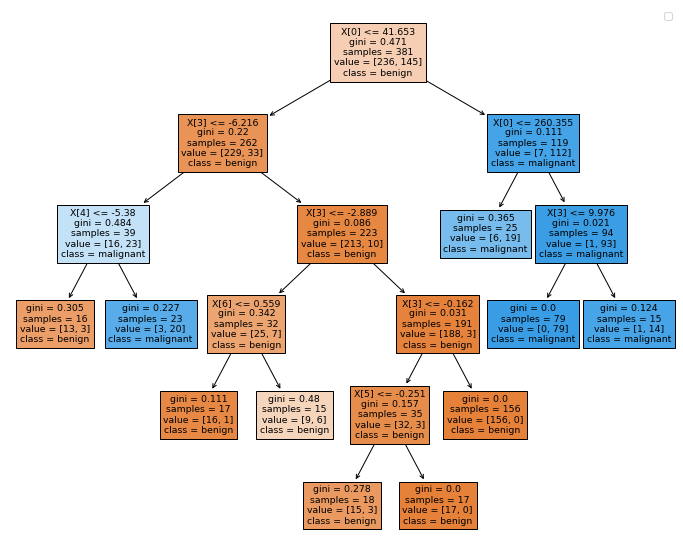

In [58]:
from sklearn import tree

plt.figure(figsize = (12,10))

DecisionTree.fit(X_train, Y_train)
tree.plot_tree(DecisionTree, filled = True, label = "all", class_names = ["benign", "malignant"])
plt.plot()
plt.legend(["green"])

For the Final Test, we are going to go compare with Logitic Regression and Linear SVM models. We will first standardize the datas before evaluating using the test data sets. 

In [59]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler


logModel = Pipeline([ ("PCA", PCA(n_components = 10)), ("Standardize", StandardScaler()), ("clf",LogisticRegression(penalty = "l2", C = 1, max_iter = 100))])
SVMModel = Pipeline([ ("PCA", PCA(n_components =10 )), ("Standardize", StandardScaler()),("clf", SVC(kernel = "linear", degree = 1, C = 0.3333))])
decisionTreeModel = Pipeline([("PCA", PCA(n_components = 10)), ("Standardize", StandardScaler()),  ("clf",DecisionTreeClassifier(max_depth = 8, min_samples_leaf = 15))])


X_train1, X_test1, Y_train1, Y_test1 = train_test_split(BCData, BCoutput, train_size = 0.67, random_state = 42)

logModel.fit(X_train1, Y_train1)
SVMModel.fit(X_train1, Y_train1)
decisionTreeModel.fit(X_train1, Y_train1)


logPreds, SVMPreds, decisionTreePreds = logModel.predict(X_test1), SVMModel.predict(X_test1), decisionTreeModel.predict(X_test1)
logScores, SVMScores, decisionTreeScores = accuracy_score(Y_test1, logPreds), accuracy_score(Y_test1, SVMPreds), accuracy_score(Y_test1, decisionTreePreds)


print("Score of logistic regression is", logScores)
print("Score of Support Vector Machine is", SVMScores)
print("Score of Decision Tree Classifier is", decisionTreeScores) 

Score of logistic regression is 0.9521276595744681
Score of Support Vector Machine is 0.9574468085106383
Score of Decision Tree Classifier is 0.9680851063829787


Conclusion:

We can clearly see through extensive testing and hyperparameter tweaking that the Decision Tree Classifier in general can accurately diagnose a 
possible breast cancer patient compared to all other models. Though it is recommended to use the Decision Tree Classifier as the tool to diagnose, there may 
be certain cases where a logistic regression may be more suitable. We can have a logistic regression adjust its threshold score in anyway we like. We can try to adjust it where it will identify more positives but increase false positives in return.
